# Face detection with openCV
This project is using OpenCV to make the face detection.In several packages,I chose the frontalface_cascade in the haarcascades. And then I found the overfitting of the experiment result. So that I used the knowledge about the CNN which I learned from the class to further classify the people and flowers,trees,birds. And then I imput the pictures that has been processed by CNN into the main code, and the overfitting has been delivered, the result is pretty good.
I also used part of the classmates' pictures to do the face detection, the result is also very good!
The code can be divided into three steps:

I. Using haarcascade package to detect face;

II. Using the CNN to classify the different objects;

III.Input the pictures into the CNN and then reload the face detection system


# Self-socring:
Tools used-openCV,haarcascade_frontalface,tensorflow (√)

Appropriateness of the data  (√) 

Appropriateness  of the optimization  Algorithm  (√)

Deep learning techniques used - CNN (√)

Successful implementation (√)

# I. Using haarcascade package to detect face

In [1]:
# import package
import cv2
import matplotlib.image
import matplotlib.pyplot
import PIL.Image, PIL.ImageDraw

# Comparing different openCV package I used and made a decision
I have used different openCV package to do the experiment, and I find in the fullbody,frontal face,eyes, upperbody and smiles, the frontal face is the most useful package to detect the faces. So that we can use the frontalface_cascade to detect the faces.

In [2]:
def detectByClf(image_name, clf):
    # Use openCV to read the data
    pic = cv2.imread(image_name)
    # the openCV we use
    smiles_cascade = cv2.CascadeClassifier(clf)
    #fullbody_cascade = cv2.CascadeClassifier(clf)
    #smiletree_cascade = cv2.CascadeClassifier(clf)
    #eyetree_cascade = cv2.CascadeClassifier(clf)
    #upperbody_cascade = cv2.CascadeClassifier(clf)
    

    #decrease dimension of the data
    if pic.ndim == 3:
        gray = cv2.cvtColor(pic, cv2.COLOR_BGR2GRAY)
    # If not, we can do follows
    else:
        gray = pic

    print("the detecting start...")
    zsz = smiles_cascade.detectMultiScale(gray, 1.2, 5)
    result = []
    for (x, y, width, height) in zsz:
        result.append((x, y, x + width, y + height))
    print("detecting finish.")
    return result

the detecting start...
detecting finish.
starting drawing the result
873 132 922 181
473 162 515 204
254 161 297 204
357 158 402 203
590 164 634 208
830 155 887 212
531 178 576 223
421 208 455 242
502 200 543 241
245 204 289 248
198 184 241 227
648 173 694 219
290 189 335 234
168 194 218 244
660 203 706 249
371 212 413 254
582 214 629 261
329 220 374 265
574 332 622 380
723 368 770 415
615 389 662 436


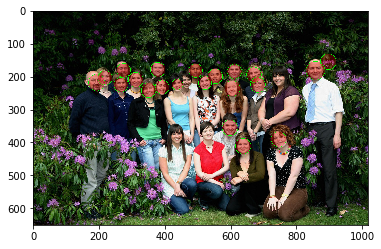

In [3]:
def main():
    clf_face = "haarcascades/haarcascade_frontalface_default.xml" #Open CV haarcascades, trained by OpenCV, which can use self-trained data
    picture = "group.jpg" #Picture input

    #start to open the pictures
    Image_object = PIL.Image.open(picture)

    #start the detection
    result = detectByClf(picture, clf_face)

    #draw the picture
    if(result):
        print("starting drawing the result")

        draw_instance = PIL.ImageDraw.Draw(Image_object,'RGBA')
        for (x1,y1,x2,y2) in result:
            draw_instance.ellipse((x1, y1, x2, y2), outline=(0, 255, 0), fill=(200,0,0,80))
            print(x1,y1,x2,y2)
#plot
    matplotlib.pyplot.imshow(Image_object)
    matplotlib.pyplot.show()

    
if __name__ == '__main__':
    main()

# Problems have been found
We can find that I use the red circle to detect the faces in the pictures. The flowers in the upper right corner are also judged as flowers. This is the result of overfitting. We can use the knowledge of convolutional neural networks to better distinguish between faces and flowers, thus eliminating the influence of other objects in the environment on face tracking.

# II. Using the CNN to classify the different objects

# A. Import the image database

In [4]:
import os
# reading image database
from PIL import Image
#matrix operation library
import numpy as np
import tensorflow as tf

# B. Read the image from the image folder into the numpy array. Here are a few details:

The pixel value of the image read by pillow is between 0 and 255 and needs to be normalized.
While reading image data and Label information, the path of the image is recorded to facilitate post-commissioning.

In [5]:
def read_data(data_dir):
    datas = []
    labels = []
    fpaths = []
    for fname in os.listdir(data_dir):
        fpath = os.path.join(data_dir, fname)
        fpaths.append(fpath)
        image = Image.open(fpath)
        data = np.array(image)
        label = int(fname.split("_")[0])
        datas.append(data)
        labels.append(label)

    datas = np.array(datas)

    return datas, np.array(labels)

In [7]:
#x1, y1 = read_data('fenlei/data1/train/')
x1, y1 = read_data('./data1/train')

In [8]:
from skimage import transform,data
import matplotlib.pyplot as plt

In [9]:
def read_data1(data_dir):
    datas = []
    labels = []
    fpaths = []
    for fname in os.listdir(data_dir):
        fpath = os.path.join(data_dir, fname)
        fpaths.append(fpath)
        image = Image.open(fpath)
        image = image.resize((32, 32),Image.ANTIALIAS)
        data = np.array(image)
        label = int(fname.split("_")[0])
        datas.append(data)
        labels.append(label)

    datas = np.array(datas)
    return datas, np.array(labels)

In [10]:
x_train, y_train = read_data1('./data1/train/')

In [11]:
x_test, y_test = read_data1('./data1/test/')

# C. Check the shape of the training and test dataset

In [12]:
#Print the data type of x_train
print(type(x_train))
#Print the data type of y_train
print(type(y_train))
#Print the data type of x_test
print(type(x_test))
#Print the data type of y_test
print(type(y_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [13]:
#Get the shape of x_train
print('x_train shape:', x_train.shape)
#Get the shape of y_train
print('y_train shape:', y_train.shape)
#Get the shape of x_train
print('x_test shape:', x_test.shape)
#Get the shape of y_train
print('y_test shape:', y_test.shape)

x_train shape: (38, 32, 32, 3)
y_train shape: (38,)
x_test shape: (15, 32, 32, 3)
y_test shape: (15,)


In [14]:
x_train[0]

array([[[ 92,  89,  77],
        [ 96,  97,  86],
        [ 97,  97,  85],
        ...,
        [ 98, 107,  99],
        [ 98, 105,  99],
        [ 95, 103,  95]],

       [[ 95,  89,  78],
        [ 98,  98,  86],
        [100,  98,  86],
        ...,
        [ 58,  65,  62],
        [ 55,  62,  60],
        [ 53,  61,  58]],

       [[ 95,  90,  78],
        [100,  99,  87],
        [102,  99,  87],
        ...,
        [ 27,  30,  33],
        [ 39,  42,  44],
        [ 25,  29,  33]],

       ...,

       [[ 75,  79,  70],
        [ 78,  66,  71],
        [ 69,  52,  70],
        ...,
        [ 58,  61,  61],
        [ 64,  68,  68],
        [ 72,  71,  67]],

       [[ 70,  70,  65],
        [ 84,  85,  79],
        [ 80,  81,  78],
        ...,
        [ 95,  93,  92],
        [ 88,  89,  88],
        [ 82,  80,  77]],

       [[ 69,  69,  64],
        [ 84,  86,  78],
        [ 82,  85,  78],
        ...,
        [ 74,  62,  56],
        [105, 101, 102],
        [101,  98,  97]]

# D. Show the image as an image instead of a series of pixel values using matplotlib.

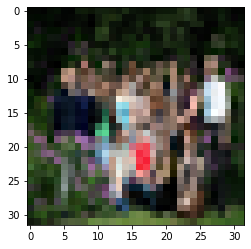

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline 
img0 = plt.imshow(x_train[21])

# E. Print the label of the image.
0-people

1-flower

2-tree

3-bird

4-sofa

In [16]:
print('The label of image 0 is:', y_train[21])

The label of image 0 is: 0


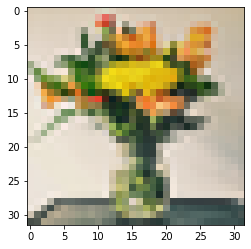

In [17]:
%matplotlib inline 
img0 = plt.imshow(x_train[10])

In [18]:
print('The label of image 0 is:', y_train[10])

The label of image 0 is: 1


# F. To categorical

In [19]:
from keras.utils import to_categorical
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

Using TensorFlow backend.


# G. Normalize the pixels in the images to be a value between 0 and 1 , they are normally values between 0 and 255¶¶
#doing this will help the neural network.

In [20]:
x_train = x_train / 255
x_test = x_test / 255

# H. To build the model I need to create the architecture using Sequential()¶
from tensorflow.keras.models import Sequential

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
model = Sequential()

# 1. Convolutional input layer, 32 feature maps with a size of 3×3 and a rectiﬁer activation function.

In [22]:
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


# 2. Dropout layer at 20%.

In [23]:
from tensorflow.keras.layers import Dropout
model.add(Dropout(0.2))

# 3. Convolutional layer, 32 feature maps with a size of 3×3 and a rectiﬁer activation function.

In [24]:
model.add(Conv2D(32, (3,3), activation='relu'))

# 4. Max Pool layer with size 2×2.

In [25]:
model.add(MaxPooling2D(pool_size=(2, 2)))

# 5. Dropout layer at 20%.

In [26]:
model.add(Dropout(0.2))

# 6. Max Pool layer with size 2×2

In [27]:
model.add(MaxPooling2D(pool_size=(2, 2)))

# 7. Flatten layer

In [28]:
model.add(Flatten())

# 8. Fully connected layer with 1,024 units and a rectiﬁer activation function.

In [29]:
model.add(Dense(1024, activation='relu'))

# 9. Dropout layer at 20%.

In [30]:
model.add(Dropout(0.2))

# 10. Fully connected output layer with 10 units and a softmax activation function.

In [31]:
model.add(Dense(5, activation='softmax'))

# I. Compile the model. Give it the categorical_crossentropy loss function which is used for classes
#greater than 2, the adam optimizer, and the accuracy of the model.

In [32]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam',
              metrics=['accuracy'])

In [33]:
hist = model.fit(x_train, y_train_one_hot, 
           batch_size=256, epochs=30, validation_split=0.3 )

Train on 26 samples, validate on 12 samples
Epoch 1/30
26/26 [==============================] - 0s 14ms/sample - loss: 1.6924 - acc: 0.1154 - val_loss: 1.9687 - val_acc: 0.0000e+00
Epoch 2/30
26/26 [==============================] - 0s 4ms/sample - loss: 1.8350 - acc: 0.2692 - val_loss: 1.6736 - val_acc: 0.1667
Epoch 3/30
26/26 [==============================] - 0s 4ms/sample - loss: 1.6198 - acc: 0.4231 - val_loss: 1.5456 - val_acc: 0.6667
Epoch 4/30
26/26 [==============================] - 0s 3ms/sample - loss: 1.5145 - acc: 0.3462 - val_loss: 1.5507 - val_acc: 0.5833
Epoch 5/30
26/26 [==============================] - 0s 6ms/sample - loss: 1.3085 - acc: 0.5000 - val_loss: 1.5718 - val_acc: 0.0833
Epoch 6/30
26/26 [==============================] - 0s 4ms/sample - loss: 1.2256 - acc: 0.6923 - val_loss: 1.5800 - val_acc: 0.1667
Epoch 7/30
26/26 [==============================] - 0s 3ms/sample - loss: 1.2127 - acc: 0.6923 - val_loss: 1.5792 - val_acc: 0.1667
Epoch 8/30
26/26 [=========

In [34]:
model.evaluate(x_test, y_test_one_hot)[1]

15/15 [==============================] - 0s 522us/sample - loss: 1.3792 - acc: 0.7333


0.73333335

# Graphs to visualize the test and validation data accuracy

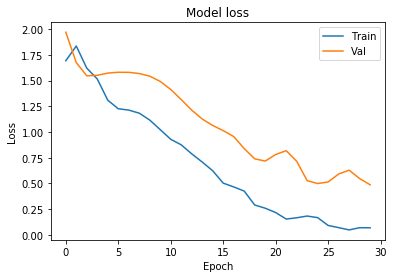

In [35]:
#Visualize the models loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

# J. Explanation of this part of results
My final accuracy is 0.7333335 which is not very good. After analyzing the implement and combine with the graph of the test and validation data accuracy, I found following problems. First of all, when the training reaches about 20th epoch, the overfitting occurs, which is the production of an analysis that corresponds too closely or exactly to a particular set of data, it may therefore fail to fit additional data. However,A technical problem is that if there are fewer than 100000 samples, it is not enough to train and test a convolutional neural network without over-fitting.

Secondly, the lack of training and the small proportion of the training set may also be the reason for the low accuracy of result. I choose 70% of the data as the training set and 30% of the data as the test set, trained 25 epoch. This number does not seem to be enough. In the future work, I will adjust the percentage of the training set and the test set appropriately, and train more times after the problem about overfitting is solved.

Thirdly, we lack of the image, I just chose 10 pictures in each category- people, flowers, trees and bird, if I can choose more than 1000 images in each, I think the machine learning work will be better. But I think it will cost a lot of time to collect the image to fullfill the database.

# III.Input the pictures into the CNN and then reload the face detection system
Through the experiment, we can find that the CNN can help me to classify the people face and the surroundings better(such as the birds, flowers and trees), now we can imput the face pictures that we need to detect the face into the CNN system and then reload the face detection system. We can find that the accuracy of the face detection has been higher.

In [36]:
#imput the pictures into the maincode
def output_data(data_dir):
    datas = []
    labels = []
    paths = []
    for fname in os.listdir(data_dir):
        path = os.path.join(data_dir, fname)
        paths.append(path)
        image = Image.open(path)
        data = np.array(image)
        label = int(fname.split("_")[0])
        datas.append(data)
        labels.append(label)
    datas = np.array(datas)
    return datas, np.array(labels)

In [37]:
def detectByClf(image_name, clf):
    # Use openCV to read the data
    pic = cv2.imread(image_name)
    # the openCV we use
    smiles_cascade = cv2.CascadeClassifier(clf)
    
    #decrease dimension of the data
    if pic.ndim == 3:
        gray = cv2.cvtColor(pic, cv2.COLOR_BGR2GRAY)
    # If not, we can do follows
    else:
        gray = pic

    print("the detecting start...")
    zsz = smiles_cascade.detectMultiScale(gray, 1.3, 5)
    result = []
    for (x, y, width, height) in zsz:
        result.append((x, y, x + width, y + height))
    print("detecting finish.")
    return result

the detecting start...
detecting finish.
starting drawing the result
254 160 297 203
357 158 402 203
474 163 514 203
830 154 886 210
197 184 240 227
288 188 336 236
587 160 637 210
505 202 540 237
531 178 575 222
248 205 289 246
659 204 705 250
168 193 219 244
374 215 412 253
580 212 630 262
330 220 373 263
574 331 623 380
722 367 772 417
613 387 662 436


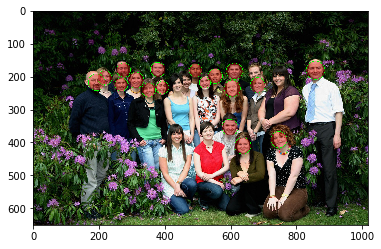

In [38]:
def main():
    clf_face = "haarcascades/haarcascade_frontalface_default.xml" #Open CV haarcascades, trained by OpenCV, which can use self-trained data
    picture = "group.jpg" #Picture input

    #start to open the pictures
    Image_object = PIL.Image.open(picture)

    #start the detection
    result = detectByClf(picture, clf_face)

    #draw the picture
    if(result):
        print("starting drawing the result")

        draw_instance = PIL.ImageDraw.Draw(Image_object,'RGBA')
        for (x1,y1,x2,y2) in result:
            draw_instance.ellipse((x1, y1, x2, y2), outline=(0, 255, 0), fill=(200,0,0,80))
            print(x1,y1,x2,y2)
#plot
    matplotlib.pyplot.imshow(Image_object)
    matplotlib.pyplot.show()

    
if __name__ == '__main__':
    main()

# The results of the experiment
Now we can find that most faces in the picture have been dectected. And the flowers haven't been detected as faces, it means that our experiment is successful.Now we can use same way to do the facedetection of the classmates' pictures. More results we find in the package fenlei

In [39]:
def detectByClf(image_name, clf):
    # Use openCV to read the data
    pic = cv2.imread(image_name)
    # the openCV we use
    smiles_cascade = cv2.CascadeClassifier(clf)
    
    #decrease dimension of the data
    if pic.ndim == 3:
        gray = cv2.cvtColor(pic, cv2.COLOR_BGR2GRAY)
    # If not, we can do follows
    else:
        gray = pic

    print("the detecting start...")
    zsz = smiles_cascade.detectMultiScale(gray, 1.2, 5)
    result = []
    for (x, y, width, height) in zsz:
        result.append((x, y, x + width, y + height))
    print("detecting finish.")
    return result

the detecting start...
detecting finish.
starting drawing the result
2178 1031 2276 1129
2540 1036 2674 1170
1311 1058 1386 1133
2008 1077 2107 1176
1551 1070 1625 1144
1610 1094 1710 1194
1196 1083 1243 1130
686 1119 764 1197
518 1121 620 1223
952 1123 1049 1220
763 1153 896 1286
1208 1174 1336 1302
1753 1181 1899 1327


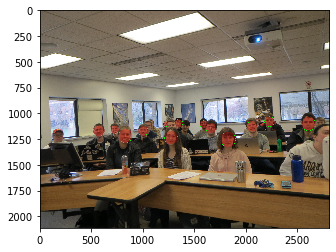

In [40]:
def main():
    clf_face = "haarcascades/haarcascade_frontalface_default.xml" #Open CV haarcascades, trained by OpenCV, which can use self-trained data
    picture = "classmates.jpg" #Picture input

    #start to open the pictures
    Image_object = PIL.Image.open(picture)

    #start the detection
    result = detectByClf(picture, clf_face)

    #draw the picture
    if(result):
        print("starting drawing the result")

        draw_instance = PIL.ImageDraw.Draw(Image_object,'RGBA')
        for (x1,y1,x2,y2) in result:
            draw_instance.ellipse((x1, y1, x2, y2), outline=(0, 255, 0), fill=(200,0,0,80))
            print(x1,y1,x2,y2)
#plot
    matplotlib.pyplot.imshow(Image_object)
    matplotlib.pyplot.show()

    
if __name__ == '__main__':
    main()